# Using MIRIAD Tasks in the IPython Notebook

The **``lib``** module is used to run **``MIRIAD``** tasks in the IPython Notebook. 

### Basic Use

In the IPython Notebook, you can use **``MIRIAD``** tasks as follows:

* Hook the **``MIRIAD``** task:
    * ``task = lib.miriad('task')``
* Get the keywords/variables required for the task:
    * ``task.keywords()``
* Get the detailed task help:
    * ``task.help()``
* Set a keyword:
    * ``task.keyword = value``
* Review the keywords already set:
    * ``task.inp()``
* Execute the task:
    * ``task.go()``
* If the task produces an output, e.g. an image or a visibility, use the ``rmfiles=True`` option to remove the old file. This is useful for iterative imaging, for example:
    * ``task.go(rmfiles=True)``
    
These functions can be naturally used in a Python script. 

<font color='red'>Outstanding Issues:</font>
``lib.miriad`` provides a generic hook to the **``MIRIAD``** task you want to use. It is indifferent to the specific task, and doesn't cross-check the keywords that you've set against the actual keywords for the task. *It is therefore possible to send garbage keywords to the task by accident.*
If this happens, simply re-hook the task and start again. 

### Use Case - Continuum Imaging

In this example, we will use MIRIAD tasks to do iterative image in the IPython Notebook.

Start your notebook by importing **``lib``** and setting up the logger. The logger provides detailed and useful feedback from the tasks that you execute. Using the logger with the *debug* level ensures that you see the full output of your task. 

We also change the working directory of the IPython Notebook. This helps use avoid having to specify the full path each time we execute a task. 


In [1]:
# Basic and Mandatory Header Cell. 
# You should NOT rerun this cell if you have not restarted the kernel.
from apercal import lib
import os
lib.setup_logger('debug', logfile='/home/frank/ipython-miriad.log')
%matplotlib inline
path = '/home/frank/tutorials/tutorial-ngc3998/example/'
os.chdir(path)

root - INFO : Logging started!
root - INFO : To see the log in a bash window use the following command:
root - INFO : tail -n +1 -f /home/frank/ipython-miriad.log


Setup logger with lib.setup_logger()


### Defining a MIRIAD task and setting the variables

We will start by hooking the **``INVERT``** task:

In [3]:
invert = lib.miriad('invert')

You can look-up the keywords for the task as follows:

In [4]:
invert.keywords()

masher - INFO : invert -kw 
basher - DEBUG : invert -kw 
basher - INFO : Command = invert -kw 
basher - INFO : 

invert: CVS Revision 1.12, 2012/05/25 12:53:15 UTC

Keyword: vis
Keyword: map
Keyword: beam
Keyword: imsize
Keyword: cell
Keyword: offset
Keyword: fwhm
Keyword: sup
Keyword: robust
Keyword: line
Keyword: ref
Keyword: select
Keyword: stokes
Keyword: options
Keyword: mode
Keyword: slop

basher - DEBUG : Returning output.


The full task help can be similarly accessed:

In [5]:
invert.help()

masher - INFO : invert -k 
basher - DEBUG : invert -k 
basher - INFO : Command = invert -k 
basher - INFO : 

invert: CVS Revision 1.12, 2012/05/25 12:53:15 UTC

Task:    invert

Responsible: Bob Sault

         INVERT is a MIRIAD task that forms images from visibilities.
         INVERT can form continuum images or spectral line cubes.  It can
         generate images/cubes for several polarisations, as well as
         handling multi-frequency synthesis and mosaicing observations.
         INVERT can also form complex-valued images from non-Hermitian
         data (e.g. holography data).  Appropriate point-spread functions
         can also be generated.

Keyword: vis
         Input visibility data files.  Several files can be given.
         No default.

Keyword: map
         Output map (image) file name.  Each output file consists of a
         single polarization/Stokes parameter.  If several different
         pols/Stokes images are being made, then several file names
         sh

We can set variables for the task as follows:

In [6]:
invert.vis = 'src.uv_chan0'
invert.options = 'double'
invert.cell = 4
invert.imsize = 1500
invert.robust = -2
invert.map = 'map'
invert.beam = 'beam'

You can check the variables that you've set as follows:

In [7]:
invert.inp()

miriad invert - INFO : map=map, task=invert, beam=beam, cell=4, vis=src.uv_chan0, robust=-2, options=double, imsize=1500


The task is now run using **``go()``**. The text output of the task is reported and returned in the cell, so don't forget to catch it:

In [8]:
output = invert.go()

masher - INFO : invert map=map beam=beam cell=4 vis=src.uv_chan0 robust=-2 options=double imsize=1500 
basher - DEBUG : invert map=map beam=beam cell=4 vis=src.uv_chan0 robust=-2 options=double imsize=1500 
basher - DEBUG : Command = invert map=map beam=beam cell=4 vis=src.uv_chan0 robust=-2 options=double imsize=1500 
basher - DEBUG : 

invert: CVS Revision 1.12, 2012/05/25 12:53:15 UTC

Reading the visibility data ...
Applying gain corrections to src.uv_chan0
Making single plane images
Visibilities accepted: 108888
Sidelobe suppression area is 16384x16384 arcsec
 ... this corresponds to uniform weighting
Calculating the weights ...
Applying the weights ...
Theoretical rms noise: 1.813E-05
Forming the beam ...
Finished gridding  50% ...
Forming Stokes I  image ...
Completed 100% !

basher - ERROR : ### Warning [invert]:  Visibilities rejected: 21970

basher - DEBUG : Returning output.
miriad invert - INFO : Completed.


If you want to delete the previous output files (e.g. clobber), then use **``go(rmfiles=True)``**.

We can have a quick look at the image by using the implot tool:

miriad fits - DEBUG : Cleanup - files will be DELETED.
basher - DEBUG : rm -r map.fits
basher - DEBUG : Returning output.
masher - INFO : fits in_=map out=map.fits op=xyout 
basher - DEBUG : fits in_=map out=map.fits op=xyout 
basher - DEBUG : Command = fits in_=map out=map.fits op=xyout 
basher - DEBUG : 

fits: CVS Revision 1.24, 2013/03/14 17:33:00 UTC


basher - DEBUG : Returning output.
miriad fits - INFO : Completed.
QIMPLOT - Quick Image Plot - INFO : RMS = 0.0012
QIMPLOT - Quick Image Plot - INFO : Plotting from -2*RMS to 10*RMS


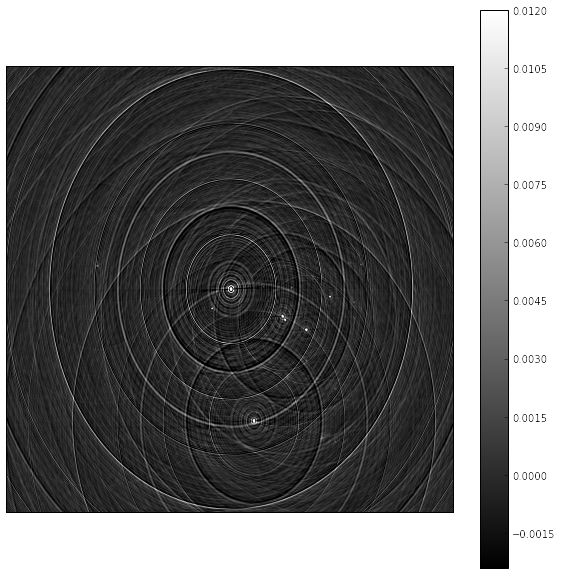

In [24]:
lib.qimplot('map', rmin=-2, rmax=+10, cmap='gray')

**``lib.qimplot``** has limited functionality, and will only plot the first channel of the image, so it isn't particularly useful for visualizing a cube (yet :). 

Now we're going to fetch the image maximum:

In [10]:
imstat = lib.miriad('imstat')
imstat.in_ = 'map'
output = imstat.go()

masher - INFO : imstat in_=map 
basher - DEBUG : imstat in_=map 
basher - DEBUG : Command = imstat in_=map 
basher - DEBUG : 
IMSTAT: version 23-mar-2012
***** Statistics of image map *****
      Bounding box: blc=(1,1,1,1), trc=(1500,1500,1,1)
      Unit of datavalues: JY/BEAM
      Unit of statistics: JY/BEAM
      Axes of planes : RA---SIN, DEC--SIN

Axis 4 (STOKES):   1
Axis 3 (VELO-HEL)
  plane    Velocity     Sum      Mean      rms     Maximum   Minimum    Npoints
     1     1030.4      1.27     5.645E-07 1.199E-03 0.166    -8.115E-03 2250000

Axis 4 (STOKES)
  cube      Stokes      Sum      Mean      rms     Maximum   Minimum    Npoints
     1        1.0      1.27     5.645E-07 1.199E-03 0.166    -8.115E-03 2250000

 Total                  Sum      Mean      rms     Maximum   Minimum    Npoints
                       1.27     5.645E-07 1.199E-03 0.166    -8.115E-03 2250000

basher - DEBUG : Returning output.
miriad imstat - INFO : Completed.


The maximum is 0.165 Jy/beam. We'll define a mask as a third of this:

In [11]:
immax = 0.165 
maths = lib.miriad('maths')
maths.exp = 'map'
maths.mask = 'map.gt.'+str(immax/3)
maths.out = 'mask'
output = maths.go()

masher - INFO : maths mask=map.gt.0.055 exp=map out=mask 
basher - DEBUG : maths mask=map.gt.0.055 exp=map out=mask 
basher - DEBUG : Command = maths mask=map.gt.0.055 exp=map out=mask 
basher - DEBUG : 

maths: CVS Revision 1.5, 2013/12/27 18:32:30 UTC


basher - DEBUG : Returning output.
miriad maths - INFO : Completed.


Now we're going to clean the dirty map, using this mask, with a threshold that is 10 times deeper than the mask cutoff.

In [12]:
clean = lib.miriad('clean')
clean.niters = 10000
clean.cutoff = immax/30
clean.out = 'model'
clean.beam = 'beam'
clean.map = 'map'
clean.region = 'mask(mask)'
output = clean.go(rmfiles=True)

miriad clean - DEBUG : Cleanup - files will be DELETED.
masher - INFO : clean map=map cutoff=0.0055 region=mask(mask) beam=beam niters=10000 out=model 
basher - DEBUG : clean map=map cutoff=0.0055 region=mask(mask) beam=beam niters=10000 out=model 
basher - DEBUG : Command = clean map=map cutoff=0.0055 region=mask\(mask\) beam=beam niters=10000 out=model 
basher - DEBUG : 

clean: CVS Revision 1.7, 2012/06/04 21:20:55 UTC

Begin iterating
 Clark  Iterations: 30
 Residual min,max,rms:    6.124E-03   2.873E-02   2.099E-02
 Total CLEANed flux:    1.990E-01
 Clark  Iterations: 86
 Residual min,max,rms:   -4.423E-04   3.755E-03   2.227E-03
 Total CLEANed flux:    2.674E-01
 Stopping -- Clean cutoff limit reached

basher - DEBUG : Returning output.
miriad clean - INFO : Completed.


Let's restor this to see what we get:

In [13]:
restor = lib.miriad('restor')
restor.map = 'map'
restor.beam = 'beam'
restor.model = 'model'
restor.out = 'image'
restor.go()

masher - INFO : restor map=map model=model beam=beam out=image 
basher - DEBUG : restor map=map model=model beam=beam out=image 
basher - DEBUG : Command = restor map=map model=model beam=beam out=image 
basher - DEBUG : 

restor: CVS Revision 1.6, 2013/07/20 03:35:27 UTC

Using Gaussian beam fwhm of   18.139 by   14.182 arcsec.
Position angle:    0.6 degrees.

basher - DEBUG : Returning output.
miriad restor - INFO : Completed.


['',
 'restor: CVS Revision 1.6, 2013/07/20 03:35:27 UTC',
 '',
 'Using Gaussian beam fwhm of   18.139 by   14.182 arcsec.',
 'Position angle:    0.6 degrees.']

In the previous call of **``restor``** we didn't catch the output. Note how the output list gets printed at the end of the logger's report.

Now let's have a quick look at this using implot:

miriad fits - DEBUG : Cleanup - files will be DELETED.
basher - DEBUG : rm -r image.fits
basher - DEBUG : Returning output.
masher - INFO : fits in_=image out=image.fits op=xyout 
basher - DEBUG : fits in_=image out=image.fits op=xyout 
basher - DEBUG : Command = fits in_=image out=image.fits op=xyout 
basher - DEBUG : 

fits: CVS Revision 1.24, 2013/03/14 17:33:00 UTC


basher - DEBUG : Returning output.
miriad fits - INFO : Completed.
QIMPLOT - Quick Image Plot - INFO : RMS = 0.00061
QIMPLOT - Quick Image Plot - INFO : Plotting from -2*RMS to 10*RMS


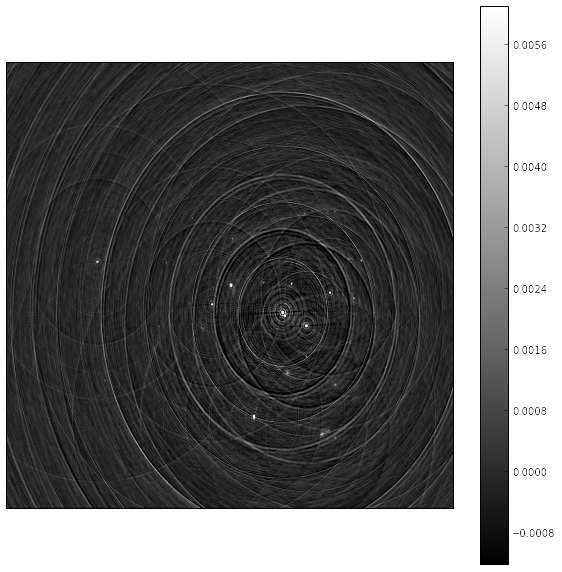

In [14]:
lib.qimplot('image', rmin=-2, rmax=+10, cmap='gray')

This looks slightly better, but we can repeat this process a few times to get a decent image. We can insert all the relevant commands in a single cell, and re-execute it iteratively:

miriad maths - DEBUG : Cleanup - files will be DELETED.
basher - DEBUG : rm -r mask
basher - DEBUG : Returning output.
masher - INFO : maths mask=image.gt.0.00165 exp=map out=mask 
basher - DEBUG : maths mask=image.gt.0.00165 exp=map out=mask 
basher - DEBUG : Command = maths mask=image.gt.0.00165 exp=map out=mask 
basher - DEBUG : 

maths: CVS Revision 1.5, 2013/12/27 18:32:30 UTC


basher - DEBUG : Returning output.
miriad maths - INFO : Completed.
miriad clean - DEBUG : Cleanup - files will be DELETED.
basher - DEBUG : rm -r model
basher - DEBUG : Returning output.
masher - INFO : clean map=map cutoff=0.000165 region=mask(mask) beam=beam niters=10000 out=model 
basher - DEBUG : clean map=map cutoff=0.000165 region=mask(mask) beam=beam niters=10000 out=model 
basher - DEBUG : Command = clean map=map cutoff=0.000165 region=mask\(mask\) beam=beam niters=10000 out=model 
basher - DEBUG : 

clean: CVS Revision 1.7, 2012/06/04 21:20:55 UTC

Begin iterating
 Clark  Iterations: 34
 Residual

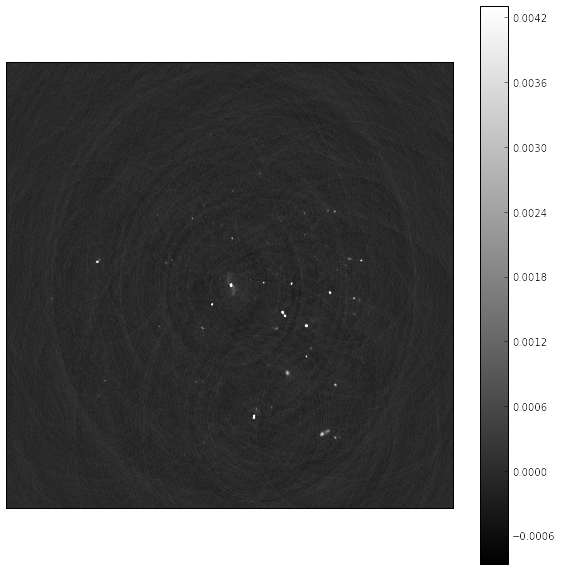

In [22]:
# Make a new mask
maths.mask = 'image.gt.'+str(immax/100)
maths.out = 'mask'
output = maths.go(rmfiles=True)

# Clean using this mask
clean.cutoff = str(immax/1000)
output = clean.go(rmfiles=True)

# Make a restored image
restor.go(rmfiles=True)

# Have a look at the image.
lib.qimplot('image', rmin=-2, rmax=+10, cmap='gray')

As you may have noticed, the mask and clean cutoffs in the previous cell were quite large. This is because I re-ran this cell several times, iteratively decreasing the mask and clean thresholds to produce the image above. 

